In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import os
from scipy.io import loadmat
import seaborn as sns
import pandas as pd
import plotly.express as px 
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
def read_HSI():
  X=loadmat('/content/Indian_pines.mat')['indian_pines']
  Y=loadmat('/content/Indian_pines_gt.mat')['indian_pines_gt']
  print(f"X shape:{X.shape}\n Y shape:{Y.shape}")
  return X,Y
X,Y=read_HSI()

X shape:(145, 145, 220)
 Y shape:(145, 145)


In [ ]:
pip install spectral

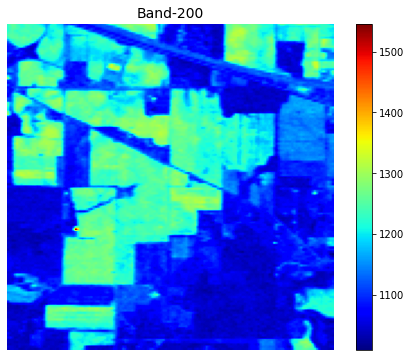

In [ ]:
def plot_band(dataset):
  plt.figure(figsize=(8,6))
  band_no=200
  plt.imshow(dataset[:,:,band_no],cmap='jet')
  plt.title(f'Band-{band_no}',fontsize=14)
  plt.axis("off")
  plt.colorbar()
  plt.show()
plot_band(X)

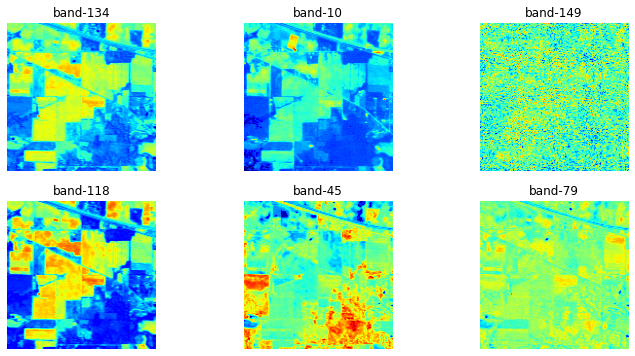

In [ ]:
sns.axes_style("whitegrid")
fig=plt.figure(figsize=(12,6))
for i in range(1,1+6):
  fig.add_subplot(2,3,i)
  q=np.random.randint(X.shape[2])
  plt.imshow(X[:,:,q],cmap="jet")
  plt.axis("off")
  plt.title(f"band-{q}")

# CONVERTING HYPERSPECTRAL DATA INTO CSV DATASET

In [ ]:
def extract_pixels(X,Y):
  q=X.reshape(-1,X.shape[2])
  df=pd.DataFrame(data=q)
  df=pd.concat([df,pd.DataFrame(data=Y.ravel())],axis=1)
  df.columns=[f"band{i}" for i in range(1,1+X.shape[2])]+["class"]
  df.to_csv("IndianDataset.csv")
  return df
df=extract_pixels(X,Y)

In [ ]:
df=pd.read_csv("IndianDataset.csv")
df

,Unnamed: 0,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,band11,band12,band13,band14,band15,band16,band17,band18,band19,band20,band21,band22,band23,band24,band25,band26,band27,band28,band29,band30,band31,band32,band33,band34,band35,band36,band37,band38,band39,...,band182,band183,band184,band185,band186,band187,band188,band189,band190,band191,band192,band193,band194,band195,band196,band197,band198,band199,band200,band201,band202,band203,band204,band205,band206,band207,band208,band209,band210,band211,band212,band213,band214,band215,band216,band217,band218,band219,band220,class
0,0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,4816,4769,4610,4805,4828,4861,4767,4624,4549,4463,4462,4446,4445,4336,4381,4319,4207,4305,4311,3991,4168,3942,4061,4362,4318,4252,4869,5284,5055,...,1381,1396,1381,1353,1346,1341,1332,1324,1310,1318,1330,1310,1292,1280,1275,1266,1264,1233,1241,1232,1215,1215,1187,1168,1171,1150,1134,1123,1135,1094,1090,1112,1090,1062,1069,1057,1020,1020,1005,3
1,1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,5141,5100,4994,5172,5290,5289,5217,5053,5033,4939,4931,4941,4902,4824,4859,4805,4698,4794,4806,4452,4628,4433,4643,4967,4853,4760,5449,5768,5684,...,1415,1428,1415,1379,1370,1360,1353,1352,1336,1346,1351,1330,1315,1305,1292,1282,1286,1259,1259,1250,1229,1232,1195,1177,1184,1153,1137,1138,1137,1108,1104,1117,1091,1079,1085,1064,1029,1020,1000,3
2,2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,5227,5172,5097,5313,5411,5412,5341,5191,5140,5069,5110,5119,5046,4981,5023,4987,4862,4965,4992,4595,4756,4529,4801,5077,4983,4868,5515,5972,5913,...,1440,1443,1425,1390,1379,1376,1363,1355,1347,1361,1356,1341,1330,1321,1304,1290,1289,1263,1269,1261,1245,1241,1214,1185,1188,1156,1147,1149,1144,1111,1114,1114,1100,1065,1092,1061,1030,1016,1009,3
3,3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,5147,5078,5040,5237,5321,5344,5255,5121,5035,4956,4994,4980,4905,4857,4900,4831,4720,4848,4847,4484,4613,4402,4674,4966,4848,4776,5473,5894,5789,...,1427,1426,1416,1386,1374,1375,1359,1343,1343,1354,1351,1333,1329,1313,1296,1280,1281,1251,1255,1253,1238,1223,1207,1188,1188,1154,1143,1144,1146,1122,1108,1109,1109,1071,1088,1060,1030,1006,1005,3
4,4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,4853,4857,4734,4879,4976,4958,4885,4754,4647,4532,4586,4591,4492,4453,4497,4398,4297,4408,4401,4102,4227,4075,4264,4529,4490,4438,5001,5378,5321,...,1397,1395,1390,1368,1349,1354,1340,1330,1324,1336,1332,1320,1307,1287,1283,1267,1265,1239,1240,1239,1229,1212,1202,1178,1178,1143,1135,1138,1135,1110,1107,1112,1094,1072,1087,1052,1034,1019,1019,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21020,21020,2561,3987,4011,4023,4201,4377,4418,4248,4180,3838,3762,3696,3594,3750,3806,3764,3655,2611,3199,3036,2978,2837,2758,2650,2617,2494,2397,2366,2313,2198,2464,2261,2490,3124,3643,4349,5748,6973,7199,...,1079,1077,1086,1071,1084,1079,1076,1082,1077,1082,1078,1077,1068,1070,1053,1063,1055,1052,1047,1042,1043,1031,1025,1034,1029,1026,1025,1018,1021,1013,1012,1018,1015,1011,1001,1000,1009,1008,1009,0
21021,21021,2726,4104,4024,3880,4210,4377,4413,4174,4229,3900,3786,3696,3623,3726,3758,3725,3614,2584,3174,3042,2958,2837,2769,2626,2617,2484,2387,2362,2322,2199,2463,2188,2444,3077,2808,4239,5706,6965,7227,...,1076,1086,1081,1069,1086,1078,1081,1078,1075,1084,1087,1082,1071,1064,1059,1063,1051,1049,1042,1042,1043,1031,1029,1029,1026,1021,1026,1021,1023,1012,1014,1012,1024,998,1010,1006,1000,1000,1004,0
21022,21022,3153,3864,4282,3889,4310,4372,4375,4208,4096,3878,3890,3683,3594,3714,3724,3700,2809,2564,3177,3031,2925,2837,2719,2605,2603,2476,2373,2335,2308,2198,2449,2164,2443,3048,3585,4264,5689,6839,7027,...,1075,1085,1075,1076,1078,1066,1075,1073,1073,107

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print("Shape of X:",X.shape)
print("Shape of Y:",y.shape)

Shape of X: (21025, 221)
Shape of Y: (21025,)


In [ ]:
X_train, X_test, y_train, y_test, indices_train, indices_test  = train_test_split(X, y,  range(X.shape[0]), 
                                                                                  test_size = 0.2, random_state = 0)


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
classifier_knn = KNeighborsClassifier(n_neighbors = 3)
classifier_knn.fit(X_train, y_train)

y_pred = classifier_knn.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,"%")
error = 100-(accuracy*100)
print("Error %age:",error)

Accuracy: 85.46967895362664 %
Error %age: 14.53032104637336


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print("Shape of X:",X.shape)
print("Shape of Y:",y.shape)

Shape of X: (21025, 221)
Shape of Y: (21025,)


#PCA

In [ ]:
pca = PCA(n_components = 100)
principalComponents = pca.fit_transform(X)
print("After Reduction:",principalComponents.shape)

After Reduction: (21025, 100)


In [ ]:
X_train, X_test, y_train, y_test, indices_train, indices_test  = train_test_split(principalComponents, y,  range(X.shape[0]), 
                                                                                  test_size = 0., random_state = 0)

#KNN RESULTS AFTER PCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
classifier_knn = KNeighborsClassifier(n_neighbors = 3)
classifier_knn.fit(X_train, y_train)

y_pred = classifier_knn.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,"%")
error = 100-(accuracy*100)
print("Error %age:",error)

Accuracy: 85.42211652794293 %
Error %age: 14.577883472057067


# MNF

X shape:(145, 145, 220)
Y shape:(145, 145)
(145, 145, 220)
(145, 145, 150)


ImageView object:
  Display bands       :  [0, 75.0, 149]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-0.26411903455092584, 0.21565643745363586]
    G: [-0.04373769188649412, 0.06179548703877387]
    B: [-0.0015472767841122658, 0.0018794700830858657]

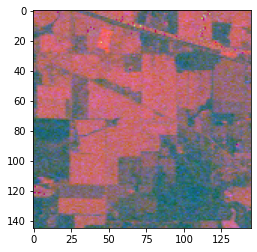

In [ ]:
from spectral import*
def read_HSI():
  X=loadmat('/content/Indian_pines.mat')['indian_pines']
  Y=loadmat('/content/Indian_pines_gt.mat')['indian_pines_gt']
  print(f"X shape:{X.shape}\nY shape:{Y.shape}")
  return X,Y
X,Y=read_HSI()

signal=calc_stats(X)
noise=noise_from_diffs(X)
mnfr=mnf(signal,noise)
denoised=mnfr.denoise(X,snr=10)
print(denoised.shape)
dataset=mnfr.reduce(X,snr=10)
dataset=mnfr.reduce(X,num=150)
print(dataset.shape)
imshow(dataset)

In [ ]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [ ]:
X_train, X_test, Y_train, Y_test, indices_train, indices_test  = train_test_split(X, Y,  range(X.shape[0]), 
                                                                                  test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
classifier_knn = KNeighborsClassifier(n_neighbors = 3)
classifier_knn.fit(X_train, Y_train)

Y_pred = classifier_knn.predict(X_test)

accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy*100,"%")
error = 100-(accuracy*100)
print("Error %age:",error)

Accuracy: 84.90805326569436 %
Error %age: 15.091946734305637
